In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [10, 5]
from matplotlib.ticker import ScalarFormatter, NullFormatter

In [8]:
ks = np.linspace(1e-5,0.01,50000)
A_s=2.e-9 #params from topology code
n_s=0.965
L_LSS=2*13824.9
#2pi/L for different sizes
L_115=2*np.pi/(1.15*L_LSS)
L_112=2*np.pi/(1.12*L_LSS)
L_118=2*np.pi/(1.18*L_LSS)
L_101=2*np.pi/(1.01*L_LSS)
L_105=2*np.pi/(1.05*L_LSS)
L_11=2*np.pi/(1.1*L_LSS)
L_12=2*np.pi/(1.2*L_LSS)
L_09=2*np.pi/(0.9*L_LSS)
L_08=2*np.pi/(0.8*L_LSS)
L_07=2*np.pi/(0.7*L_LSS)

In [5]:
#KL div for standard power law for lmax=20
KL_0_9_E1_l20= 25.851202432155297
KL_back_09_E1_l20= 15.119115480190523
KL_0_9_E2_l20= 25.678306466733755
KL_0_9_E3_l20= 25.8181201469373

KL_1_1_E1_l20=  1.6755061945037142
KL_back_11_E1_l20= 1.452953427491794
KL_1_1_E2_l20=  1.6920515465784813
KL_1_1_E3_l20=  1.6852637973360414
KL_1_2_E1_l20= 0.35480607285039034
KL_101xy_E1_l20= 16.315811375531855 #z side is 1.1
KL_101x_E1_l20= 8.985792616911493 #z and y side are 1.1
KL_101_E1_l20= 23.664736728513375
KL_115_E1_l20= 0.6971458234637358
KL_back_115_E1_l20= 0.6346900044742645
KL_105_E1_l20= 5.991628974616111
KL_back_105_E1_l20= 4.509712031686677
KL_112_E1_l20=  1.1408792038596551 
KL_back_112_E1_l20= 1.0137092694254324


KL_1_5_E1_l20= 0.028799741340072793
KL_1_5_E2_l20= 0.025253065119677842
KL_1_5_E3_l20= 0.026414490040467586

In [4]:
#KL div for standard power law for lmax=30
KL_0_9_E1= 36.014943508211026
KL_0_9_E2= 35.93071602738485
KL_0_9_E3= 36.0374370522093

KL_1_1_E1= 1.6911022011605428
KL_1_1_E2= 1.7077743421394127
KL_1_1_E3= 1.7008870201951236

KL_1_5_E1=0.02880400124376159
KL_1_5_E2=0.025256873357184406
KL_1_5_E3=0.026418326256864244

In [6]:
MovE1_11_l20=np.load("MoveE1_l20_11_width02.npy")
MovE1_112_l20=np.load("MoveE1_l20_112_width02.npy")
MovE1_105_l20=np.load("MoveE1_l20_105_width02.npy")
MovE1_101_l20=np.load("MoveE1_l20_101_width02.npy")
MovE1_115_l20=np.load("MoveE1_l20_115_width02.npy")
MovE1_09_l20=np.load("MoveE1_l20_09_width02.npy")
MovE1_09_l20_neg=np.load("MoveE1_l20_0.9_width02_neg.npy")
MovE1_08_l20=np.load("MoveE1_l20_08_width02.npy")
MovE1_07_l20=np.load("MoveE1_l20_07_width02.npy")

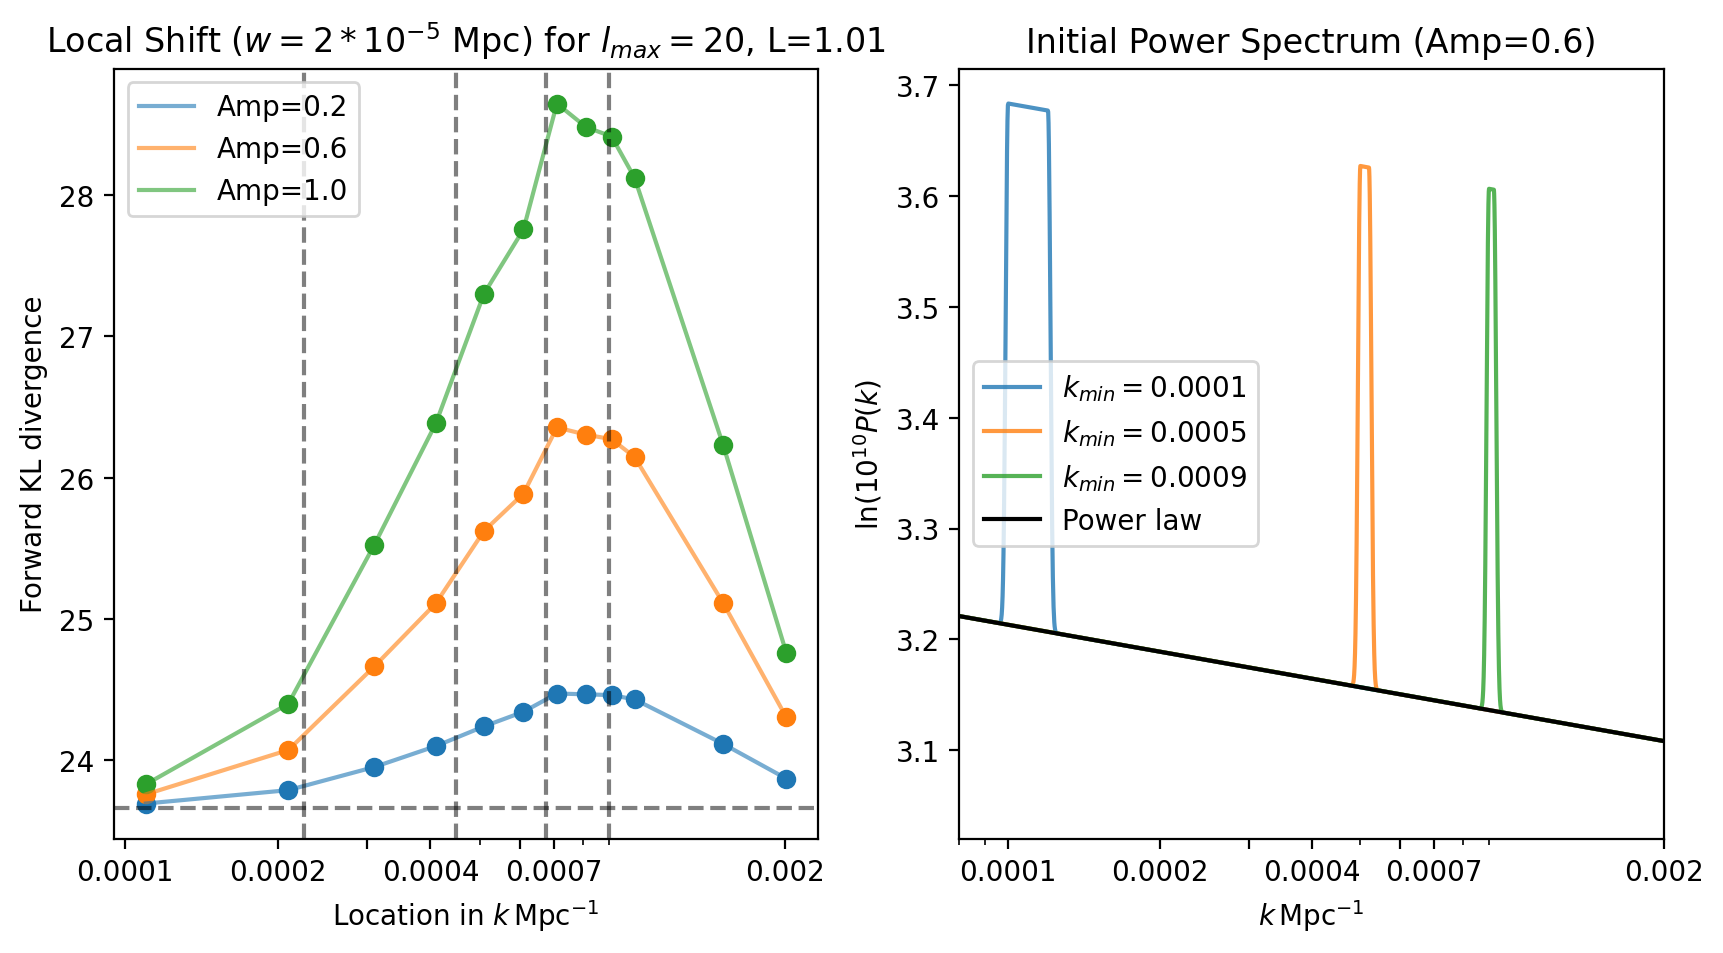

In [11]:
#shifted powlaw
def PK_pow_mov(k, As, ns, amp, kmin, kmax, sigma):
    # Compute P for all k values (unshifted)
    P = As * (k / 0.05) ** (ns - 1)

    # Fully shifted version
    P_shifted = P * (1 + amp)

    # Logarithmic values for the smoothing transition
    log_k = np.log(k)
    log_kmin = np.log(kmin)
    log_kmax = np.log(kmax)

    # Midpoints for transitions in log-space
    log_k_mid_min = log_kmin
    log_k_mid_max = log_kmax

    # Gaussian smoothing only at the boundaries around kmin and kmax
    gaussian_min = np.exp(-((log_k - log_k_mid_min) ** 2) / (2 * sigma ** 2))
    gaussian_max = np.exp(-((log_k - log_k_mid_max) ** 2) / (2 * sigma ** 2))

    # Smooth transition near kmin (from unshifted to shifted)
    mask_min = (k >= (kmin - sigma)) & (k < kmin)
    P[mask_min] = P[mask_min] * (1 - gaussian_min[mask_min]) + P_shifted[mask_min] * gaussian_min[mask_min]

    # Use fully shifted values between kmin and kmax
    P[(k >= kmin) & (k <= kmax)] = P_shifted[(k >= kmin) & (k <= kmax)]

    # Smooth transition near kmax (from shifted back to unshifted)
    mask_max = (k > kmax) & (k <= (kmax + sigma))
    P[mask_max] = P_shifted[mask_max] * gaussian_max[mask_max] + P[mask_max] * (1 - gaussian_max[mask_max])

    # For k > kmax + sigma, revert back to unshifted values
    P[k > (kmax + sigma)] = P[k > (kmax + sigma)]
    
    return P


ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2
pk_pow = A_s*(ks/0.05)**(n_s-1)

figure, axis = plt.subplots(1, 2)
for al in range(0,3): 
    axis[0].scatter(kmed, MovE1_101_l20[al,:,0])
    axis[0].plot(kmed, MovE1_101_l20[al,:,0], label=f'Amp={ampl[al]}', alpha=0.6)
    pk = PK_pow_mov(ks,A_s, n_s,0.6, kmin[4*al], kmin[4*al]+0.2e-4, 0.01)
    axis[1].semilogx(ks,np.log(10**10*pk),label=r'$k_{min}=$'f'{kmin[4*al]}', alpha=0.8)

axis[1].semilogx(ks,np.log(10**10*pk_pow), label='Power law', c='black')
axis[0].set_xscale('log')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].legend()
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=1.01')
axis[0].axvline(L_101, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_101, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_101, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_101, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_101_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')

axis[1].set_xlim(0.00008, 0.001)
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel(r'$\ln (10^{10}P(k)$')
axis[1].set_xlabel(r'$k\, {\rm Mpc^{-1}}$')
axis[1].legend()
axis[1].set_title(r'Initial Power Spectrum (Amp=0.6)')

#plt.savefig('shift_101.pdf')
plt.show()

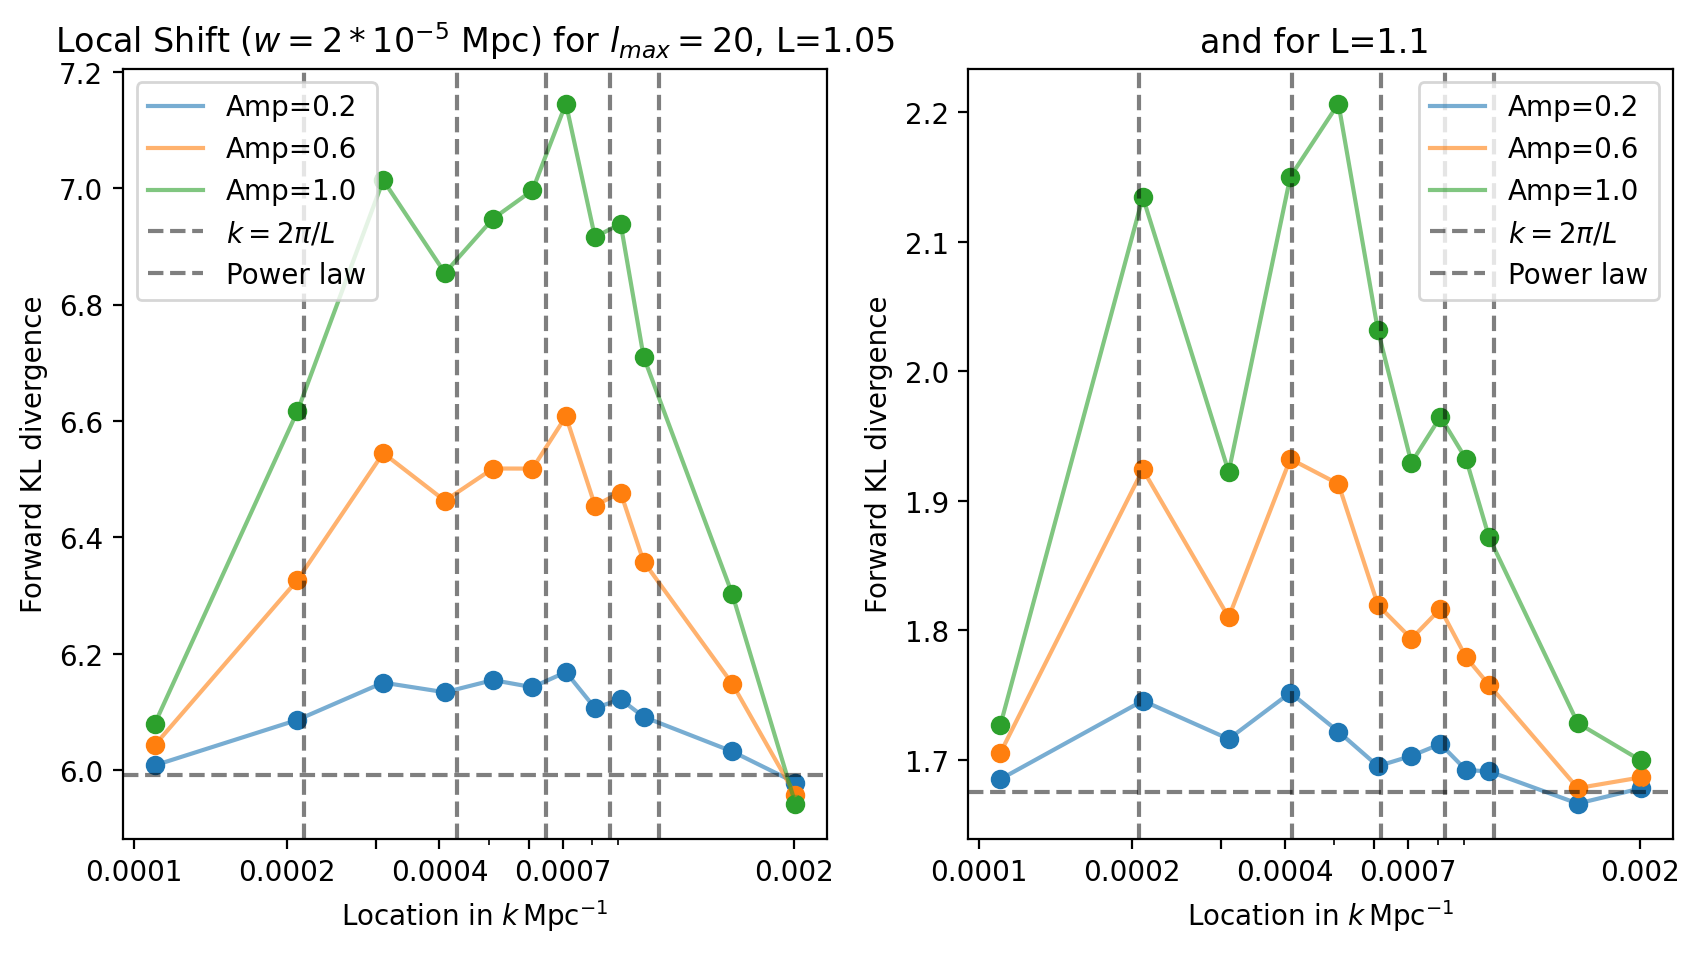

In [18]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_105_l20[f,:,0])
    axis[0].plot(kmed, MovE1_105_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_11_l20[f,:,0])
    axis[1].plot(kmed, MovE1_11_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_105, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_11, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_105_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_1_1_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=1.05')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Forward KL divergence')
axis[1].set_title(r'and for L=1.1 ')
axis[1].legend()


#plt.savefig('Mov_105_11_forwardKL.pdf')
plt.show()

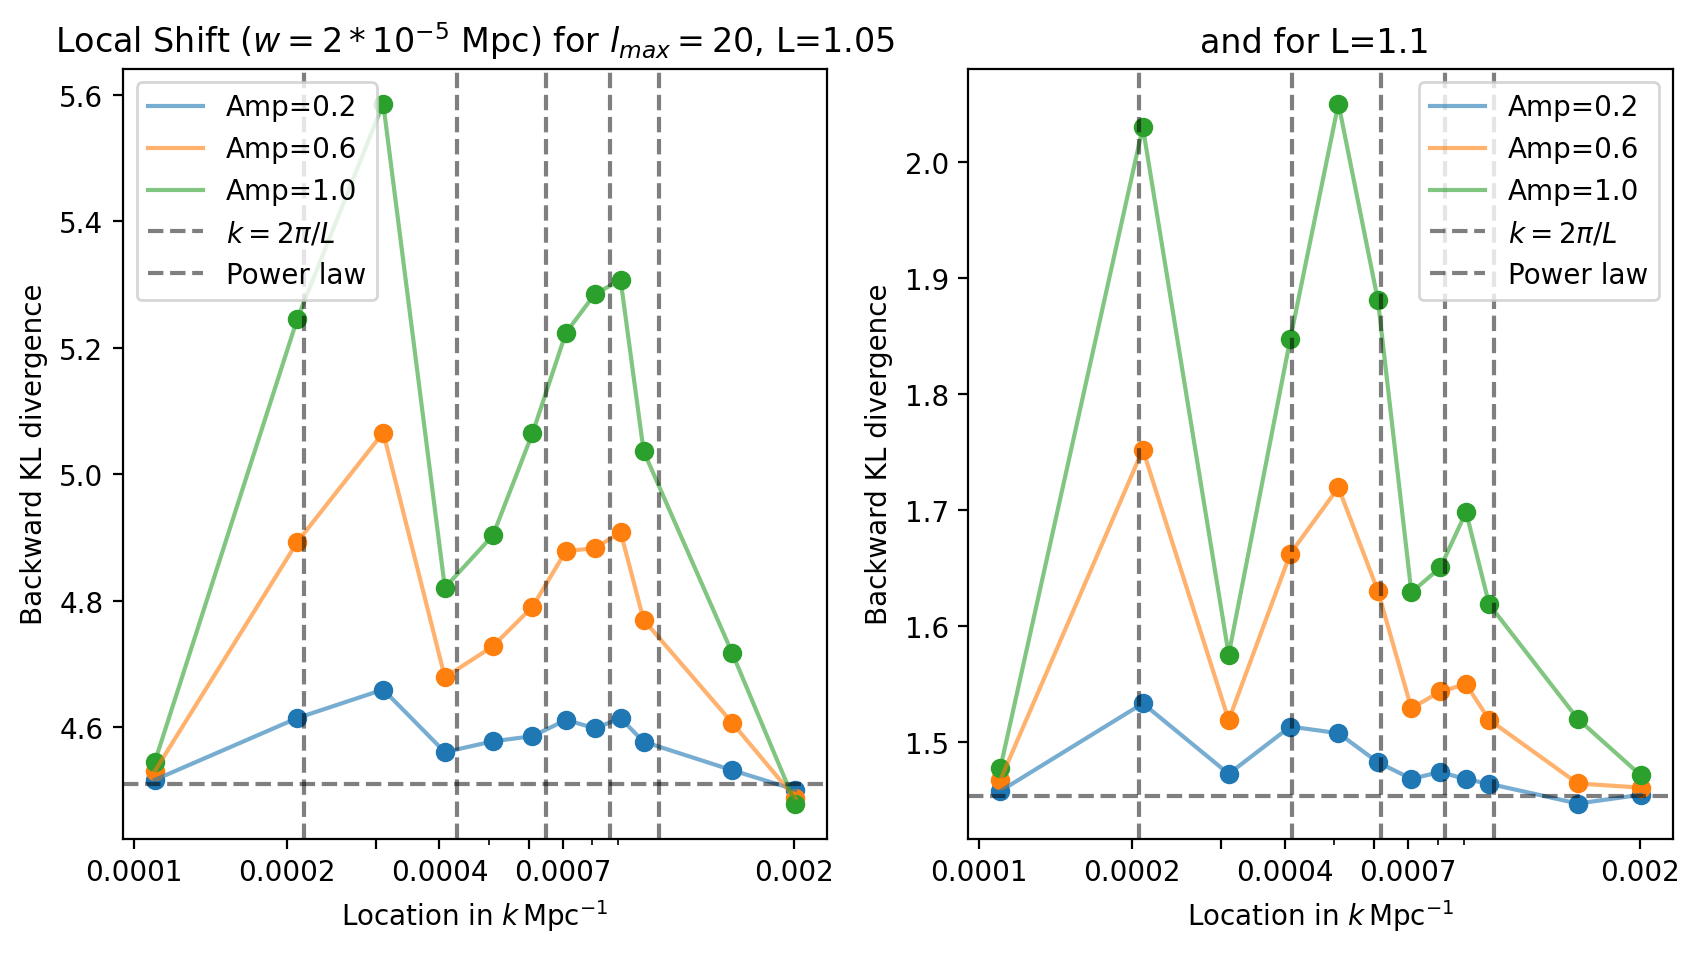

In [20]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_105_l20[f,:,1])
    axis[0].plot(kmed, MovE1_105_l20[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_11_l20[f,:,1])
    axis[1].plot(kmed, MovE1_11_l20[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_105, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_105, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_11, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_11, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_back_105_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_back_11_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Backward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=1.05')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Backward KL divergence')
axis[1].set_title(r'and for L=1.1 ')
axis[1].legend()


#plt.savefig('Mov_105_11_backwardKL.pdf')
plt.show()

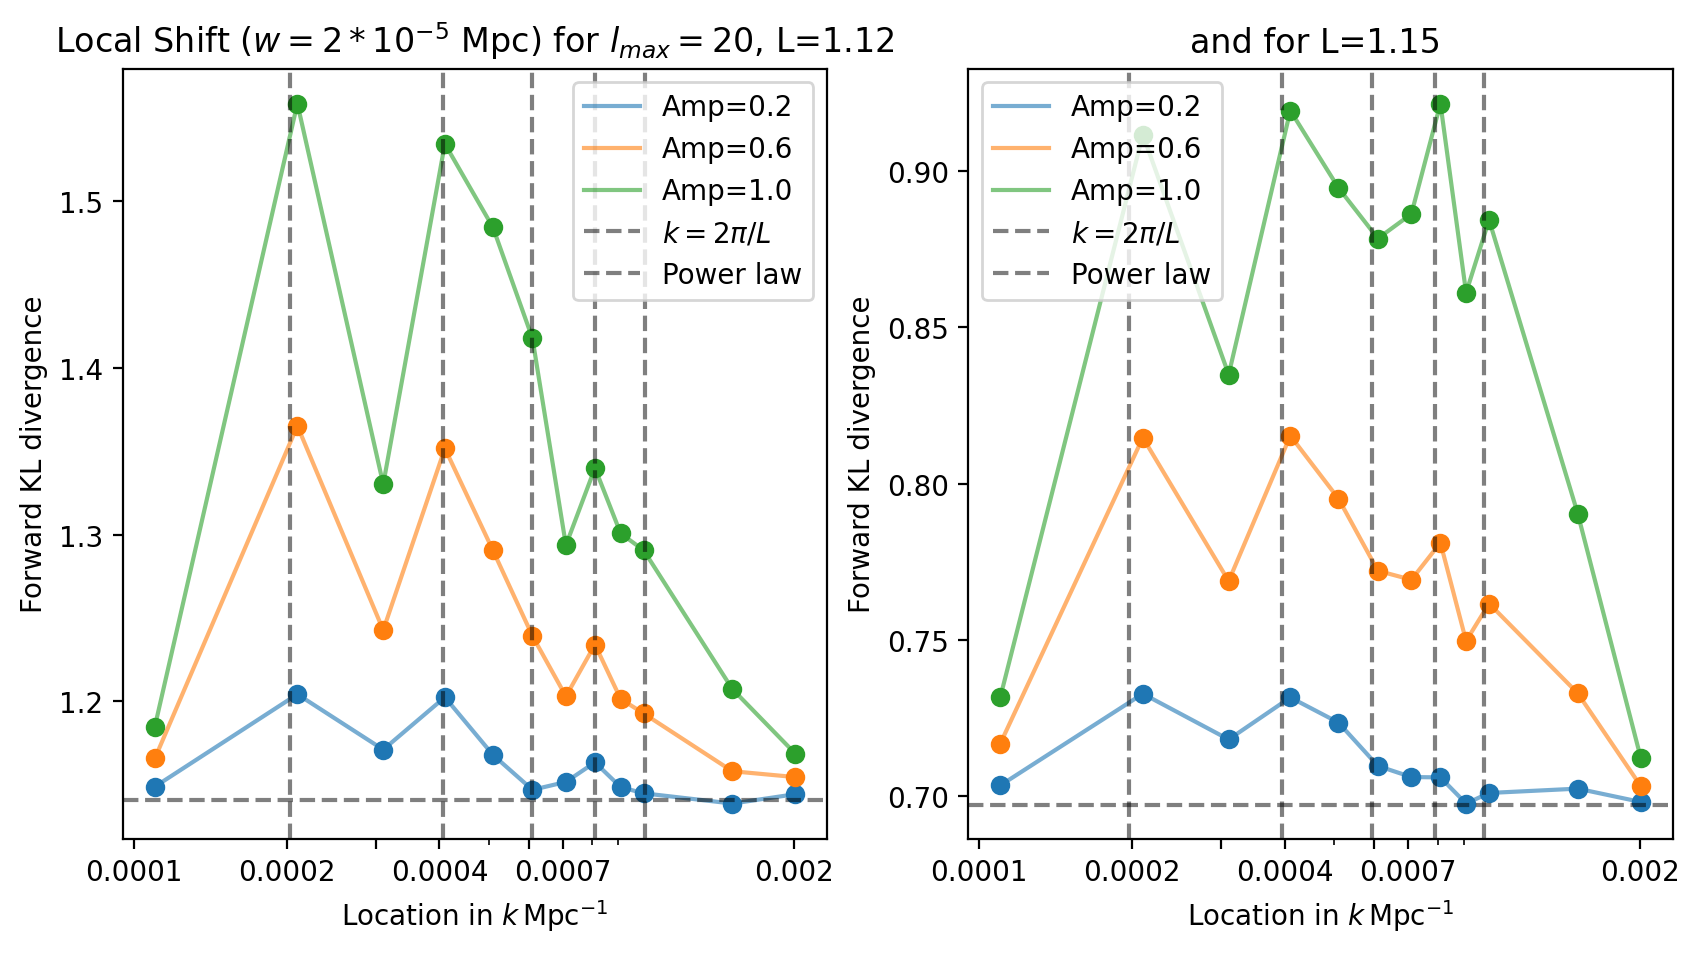

In [21]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_112_l20[f,:,0])
    axis[0].plot(kmed, MovE1_112_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_115_l20[f,:,0])
    axis[1].plot(kmed, MovE1_115_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_112, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_115, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_112_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_115_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=1.12')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Forward KL divergence')
axis[1].set_title(r'and for L=1.15 ')
axis[1].legend()

#plt.savefig('Mov_112_115_forwardKL.pdf')
plt.show()

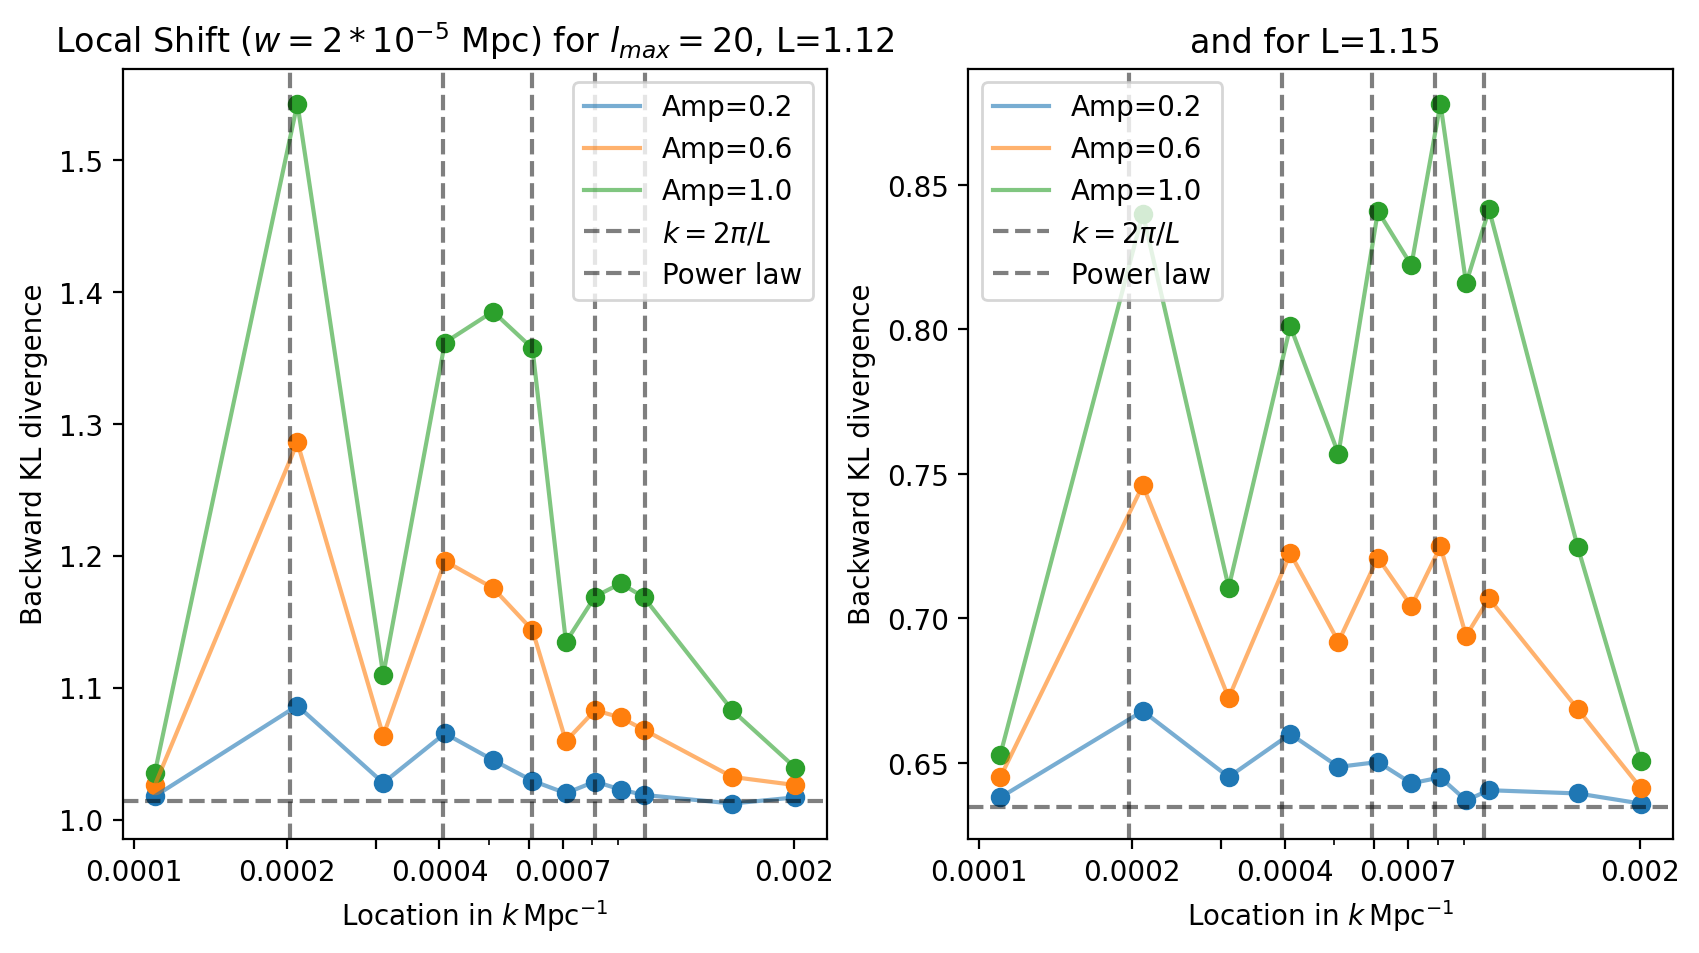

In [22]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_112_l20[f,:,1])
    axis[0].plot(kmed, MovE1_112_l20[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_115_l20[f,:,1])
    axis[1].plot(kmed, MovE1_115_l20[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_112, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_112, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_115, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_115, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_back_112_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_back_115_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Backward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=1.12')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Backward KL divergence')
axis[1].set_title(r'and for L=1.15 ')
axis[1].legend()

#plt.savefig('Mov_112_115_backwardKL.pdf')
plt.show()

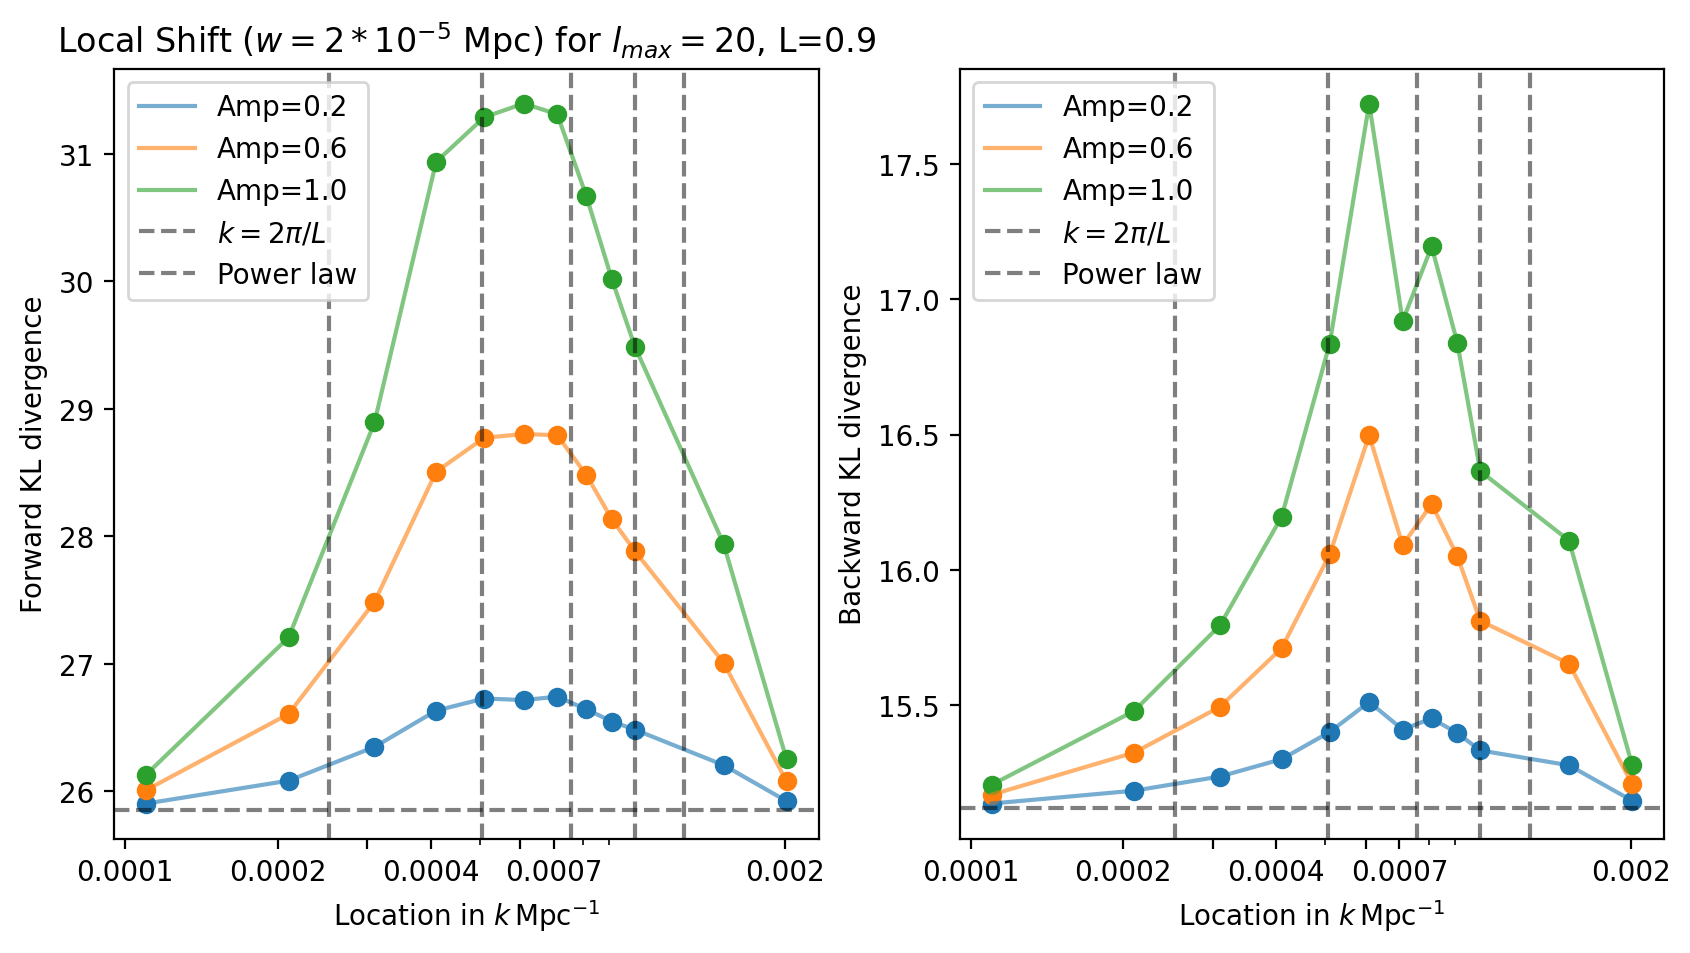

In [31]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_09_l20[f,:,0])
    axis[0].plot(kmed, MovE1_09_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_09_l20[f,:,1])
    axis[1].plot(kmed, MovE1_09_l20[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_09, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_09, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_0_9_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_back_09_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=0.9')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Backward KL divergence')
#axis[1].set_title(r'and for L=1.15 ')
axis[1].legend()

#plt.savefig('Mov_09_KL.pdf')
plt.show()

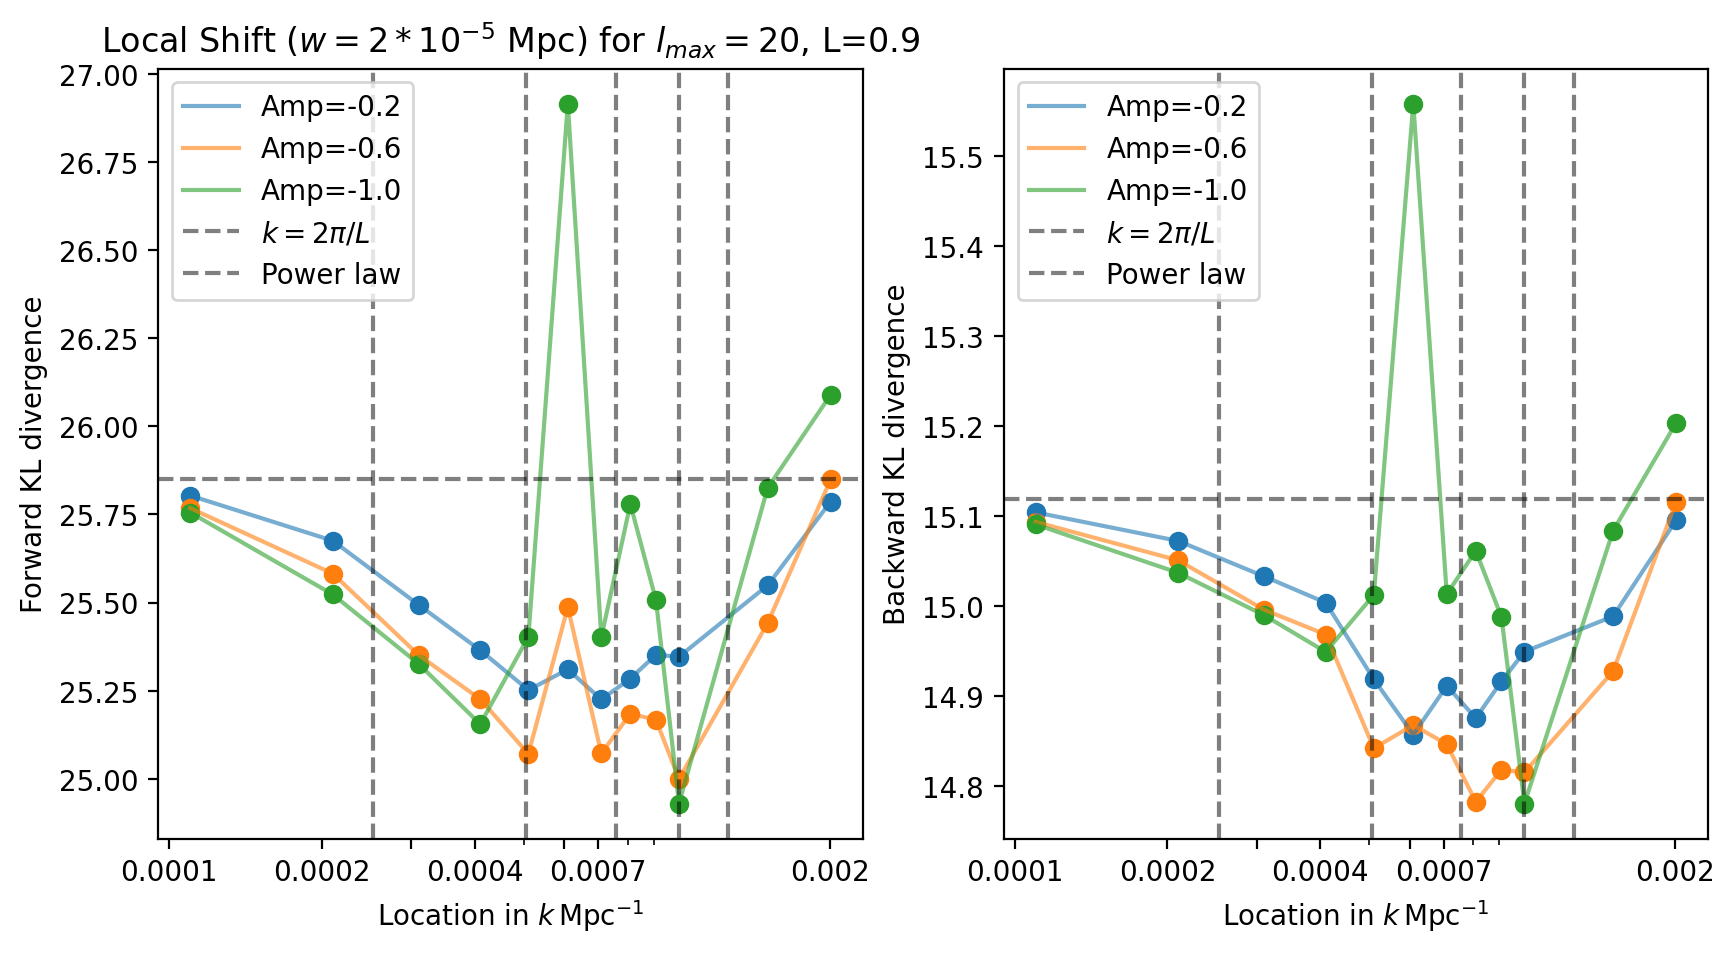

In [13]:
ampl=[-0.2,-0.6,-1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_09_l20_neg[f,:,0])
    axis[0].plot(kmed, MovE1_09_l20_neg[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_09_l20_neg[f,:,1])
    axis[1].plot(kmed, MovE1_09_l20_neg[f,:,1], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_09, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_09, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_09, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axhline(KL_0_9_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axhline(KL_back_09_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=0.9')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Backward KL divergence')
#axis[1].set_title(r'and for L=1.15 ')
axis[1].legend()

#plt.savefig('Mov_09_KL_neg.pdf')
plt.show()

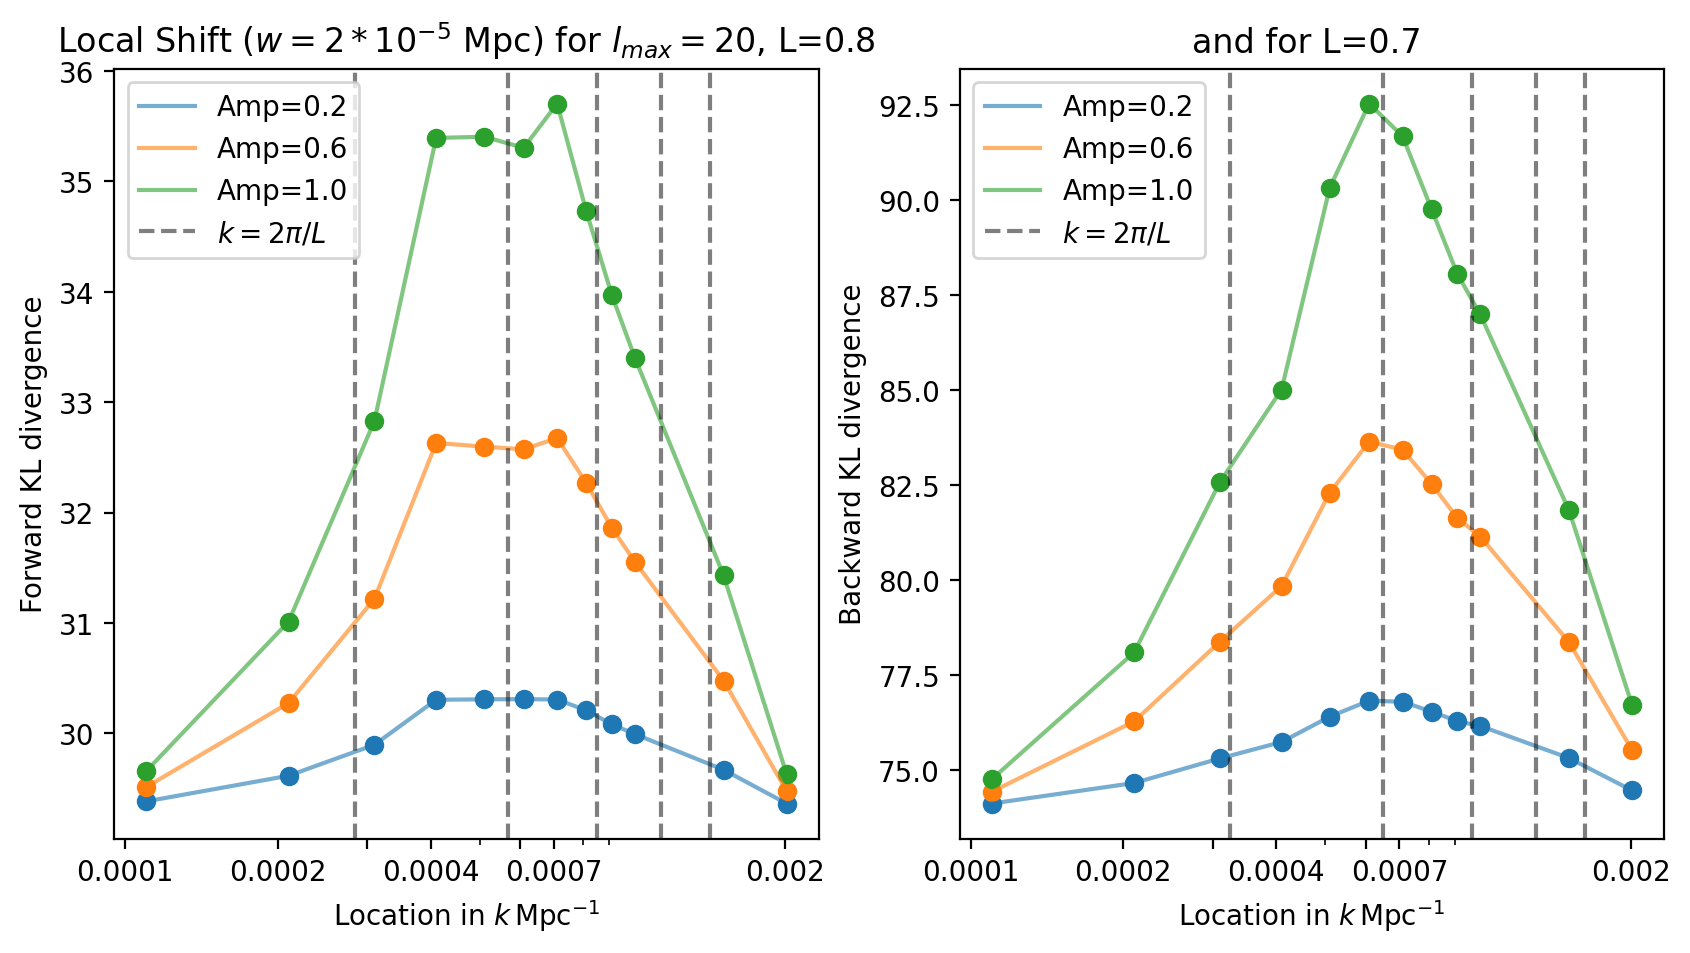

In [12]:
ampl=[0.2,0.6,1.]
kmin= np.array([1e-4,2e-4,3e-4, 4e-4, 5e-4, 6e-4, 7e-4, 8e-4, 9e-4,1e-3, 1.5e-3, 2e-3])
kmax=kmin+0.2e-4
kmed=(kmin+kmax)/2

figure, axis = plt.subplots(1, 2)
for f in range(0,3): 
    axis[0].scatter(kmed, MovE1_08_l20[f,:,0])
    axis[0].plot(kmed, MovE1_08_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)
    axis[1].scatter(kmed, MovE1_07_l20[f,:,0])
    axis[1].plot(kmed, MovE1_07_l20[f,:,0], label=f'Amp={ampl[f]}', alpha=0.6)

axis[0].set_xscale('log')
axis[0].axvline(L_08, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(2*L_08, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(3*L_08, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(4*L_08, linestyle='dashed',  alpha=0.5, c='black')
axis[0].axvline(5*L_08, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(L_07, label=r'$k=2\pi/L$', linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(2*L_07, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(3*L_07, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(4*L_07, linestyle='dashed',  alpha=0.5, c='black')
axis[1].axvline(5*L_07, linestyle='dashed',  alpha=0.5, c='black')
#axis[0].axhline(KL_0_9_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
#axis[1].axhline(KL_back_09_E1_l20, label='Power law', linestyle='dashed',  alpha=0.5, c='black')
axis[0].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[0].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[0].set_ylabel('Forward KL divergence')
axis[0].set_title(r'Local Shift ($w=2*10^{-5}$ Mpc) for $l_{max}=20$, L=0.8')
axis[0].legend()
axis[1].set_xscale('log')
axis[1].set_xlabel(r'Location in $k\, {\rm Mpc^{-1}}$')
axis[1].set_xticks([0.0001,0.0002,0.0003, 0.0004, 0.0006, 0.0007, 0.002], [0.0001,0.0002," ", 0.0004," ", 0.0007, 0.002])
axis[1].set_ylabel('Backward KL divergence')
axis[1].set_title(r'and for L=0.7 ')
axis[1].legend()

#plt.savefig('Mov_08_07_KL.pdf')
plt.show()